<h1> HOMEWORK 1 </h1>
<p> Due Sep 19 </p>

<h2> Problem 1 </h2>

<p> Plugging the perturbations into the original differential equations, we get:
<br>
$ \dot{N}_h = - k_h \epsilon_h - \delta \frac{\lambda}{k_h} \epsilon_v - \delta \epsilon_v \epsilon_h $
<br>
$ \dot{N}_i = -k_i \epsilon_i + \delta \frac{\lambda}{k_h} \epsilon_v $
<br> 
$ \dot{N}_v = \gamma + -k_v \epsilon_v $
</p>

<p>
When we drop the terms that are $ O( \epsilon^2 ) $ we get a linear system of differential equations of the following form.
<br>
$ \frac{\partial}{\partial t} \begin{bmatrix} \epsilon_h \\ \epsilon_i \\ \epsilon_v \end{bmatrix} = \begin{bmatrix} -k_h & 0 & -\delta \frac{\lambda}{k_h} \\
    0 & -k_i & \delta \frac{\lambda}{k_h} \\
    0 & \gamma & -k_v \end{bmatrix} \begin{bmatrix} \epsilon_h \\ \epsilon_i \\ \epsilon_v \end{bmatrix} $
<br>
The solutions will have the form $ \epsilon (t) = v \cdot e^{\lambda t} $, where $ \lambda $ are the eigenvalues of the 3x3 matrix.
</p>

<p> Mathematica gives the eigenvalues to be:
<br>
$ \lambda_h = -k_h $
<br>
$ \lambda_i = \frac{ -k_i k_h - k_h k_v - \sqrt{(4 \gamma \delta \lambda k_h) + k_h^2 (k_v - k_i)^2} }{2 k_h} $
<br>
$ \lambda_v = \frac{ -k_i k_h - k_h k_v + \sqrt{(4 \gamma \delta \lambda k_h) + k_h^2 (k_v - k_i)^2} }{2 k_h} $
</p>

<p> A negative value for $ \lambda $ means $ \lim_{t\to\infty} \epsilon (t) = 0 $. Thus it seems that $ \epsilon_h $ and $ \epsilon_i $ will definitely reach a steady state, but it is 
possible for $ \epsilon_v $ to begin to grow exponentially. This will be the case when $ \delta $, $ \gamma $, or $ \lambda $ are large. 
<br> 
<br>
This makes physical sense, because when $ \gamma $ is large, even a small number of infected T-cells will be able to produce a large number of virions which in turn infect more T-cells creating
a positive feedback loop. Likewise when $ \delta $ is large, a small number of virions will be able to infect a large number of T-cells, giving rise to more virions. We will only observe a damping
effect in the system when these values are sufficiently low.
</p>

<h2> Problem 2 </h2>

In [1]:
#  Part (a)
import utils
import numpy as np

# For given N, simulate the longest run of one value in sequence of N flips
NA = 4
nsims = int( 1e4 )
runs = []
for n in range(0, nsims):  
    seq = utils.flipNCoins( NA )
    runLength = utils.countLongestRun( seq )[0]
    runs.append( runLength )

averageA = np.mean( runs )
varianceA = np.std( runs ) ** 2

print('Mean longest run:\t\t' + str(averageA) )
print('Variance in length of run:\t' + str(varianceA) )

Mean longest run:		2.3764
Variance in length of run:	0.7341230400000001


In [2]:
#  Part (b)
import utils
import numpy as np

averages = []
variances = []

# Create 
Ns = np.arange(3, 11, 1)
Ns = 2**Ns
Ns = Ns.tolist()

nsims = int( 1e4 )
for N in Ns:
    runs = []
    for n in range(0, nsims):
        seq = utils.flipNCoins( N )
        runLength = utils.countLongestRun( seq )[0]
        runs.append( runLength )

    average = np.mean( runs )
    variance = np.std( runs ) ** 2

    averages.append( average )
    variances.append( variance )

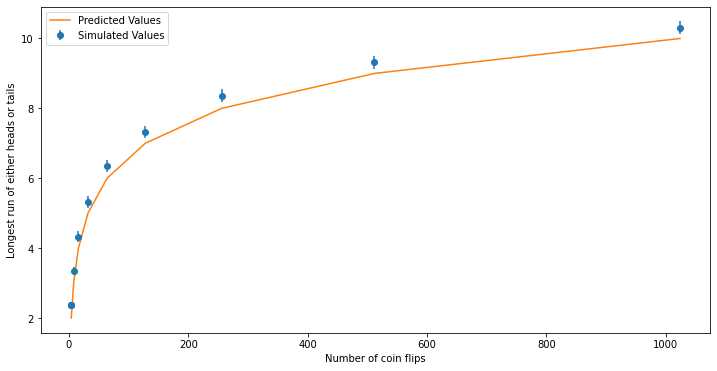

In [13]:
#  Part (c)
import matplotlib.pyplot as plt

# Aggregating parts (a) and (b)
Ns.insert(0, NA)
averages.insert(0, averageA)
variances.insert(0, varianceA)

# Two error bars: standard deviation or standard error
stdDev = np.sqrt(variances)
stdError = stdDev / np.sqrt( nsims )

# Plotting
fig, ax = plt.subplots( figsize=(12,6) )
ax.errorbar( Ns, averages, yerr=10*stdError, fmt='o', label = 'Simulated Values')
ax.plot( Ns, np.log2(Ns), label = 'Predicted Values' )
ax.legend()
ax.set_xlabel('Number of coin flips')
ax.set_ylabel('Longest run of either heads or tails')
plt.show()

<h3> Comments </h3>
<p> In the above plot, the rule of thumb $ n_{run} = log_2{N} $ seems to hold up, since the predicted value 
is always within the error bars. This is actually false though as the variance that we have calculated is 
the variance in a given coin flip and not the variance in the mean. Plotting using the standard error instead of
the standard deviation shows that the rule of thumb slightly, but consistently, underestimates the actual
longest runs. 
<br><br>
For a given flip, the rule of thumb will be more than good enough, but it is detectably wrong when the experiment
is repeated enough times. </p>

<h2> Problem 3 </h2>

Total cells: 324


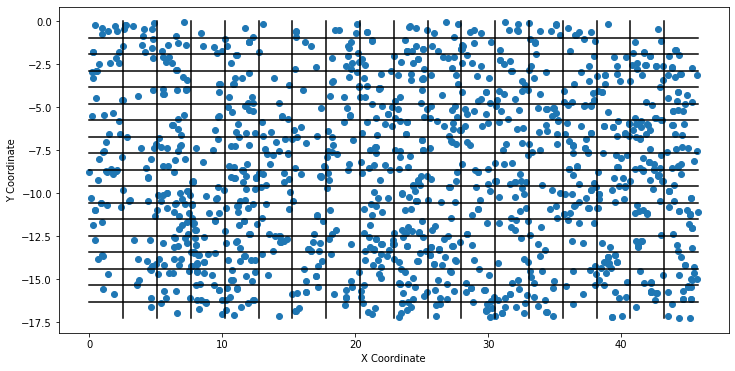

In [10]:
# Parts (a) and 
import numpy as np
import matplotlib.pyplot as plt

x = np.load('londonIncidents.npz')

# Unpack data into a useful structure
x_coords = x['all'][:,0]
y_coords = x['all'][:,1]

fig, ax = plt.subplots( figsize=(12,6) )

# Plot raw data
ax.scatter(x_coords, y_coords)

# Add vertical and horizontal lines dividing into strips
M = 18       # Number of horizontal compartments
N = 18       # Number of vertical compartments
print( 'Total cells: ' + str( N*M ) )
ymin = np.min(y_coords)
xmax = np.max(x_coords)

vert_line = np.array( [ymin, 0] )
horz_line = np.array( [0, xmax] )

horz_line_list = np.arange(ymin - (ymin / M), 0, -1 * ymin / M)
vert_line_list = np.arange(xmax / N , xmax, xmax / N)

for item in horz_line_list:
    yax = item * np.ones( np.shape(horz_line) )
    ax.plot(horz_line, yax, color = 'black')

for item in vert_line_list:
    xax = item * np.ones( np.shape(vert_line) )
    ax.plot(xax, vert_line, color = 'black')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
plt.show()

<h3> Comments  </h3>
<p> If we add too many cells, then won't have enough data points to realistically sample all of the bins that we're trying to fill.
If we have too few cells, then we'll have enough data, but we may miss very dense local clusters because the rest of the cell is less
dense and essentially averages it out. </p>

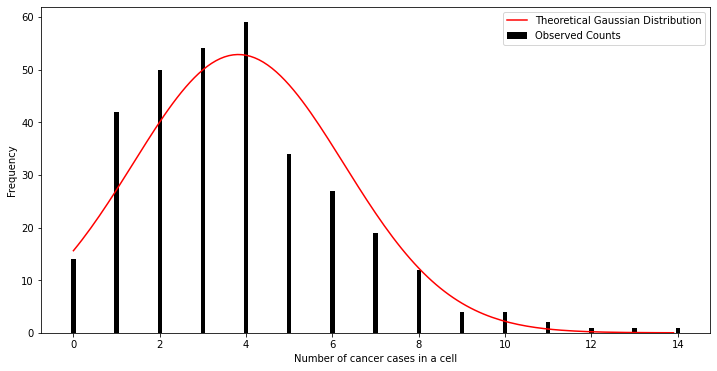

In [11]:
# parts (c) and (d)
import utils 
from scipy.stats import norm

cellCounts = utils.bin2d(x, N, M)
x_ax, y_ax = utils.intBin(cellCounts)

# The distribution is theoretically gaussian. Calculating the exact parameters
mean = np.mean(cellCounts.flatten())
std = np.std(cellCounts.flatten())
scaling = N*M

fig, ax = plt.subplots( figsize=(12,6) )

ax.bar(x_ax, y_ax, width = .1, color='black', align='center', label='Observed Counts')

x_cont = np.arange(0, x_ax[-1], .1)
gaussian = norm(scale=std, loc=mean)
ax.plot(x_cont, scaling*gaussian.pdf(x_cont), color='red', label='Theoretical Gaussian Distribution')

ax.legend()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of cancer cases in a cell')

plt.show()

<h3> Comments </h3> 
<p> Theoretically, since the count in every cell is independent of all the other ones, the governing distribution should be a Gaussian by the central limit theorem.
This appears to not be the case for the observed data however. First of all, there are some cells with a higher count that what the Gaussian distribution predicts should
be probable. Secondly, there seems to be an asymmetry in the observed data such that the probability of a count is not symmetric about the mean. </p>

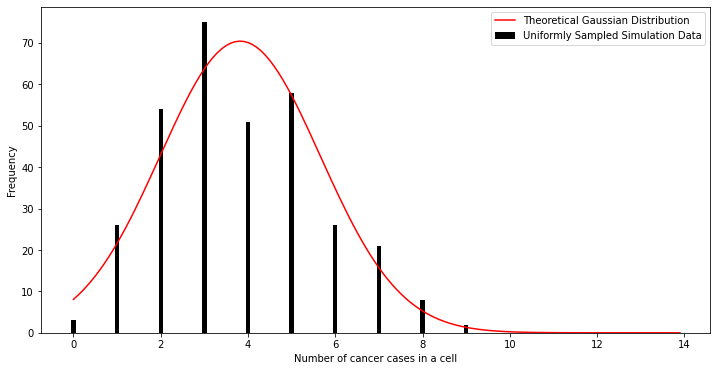

In [12]:
# part (e)

uniform_data = {}
uniform_x = xmax * np.random.random( np.shape(x['all'][:,0]) )
uniform_y = ymin * np.random.random( np.shape(x['all'][:,1]) )
uniform_data['all'] = np.zeros( np.shape(x['all']) )
for i in range( len(uniform_x) ):
    uniform_data['all'][i] = [uniform_x[i], uniform_y[i]]

# Generate parameters for the theoretical Gaussian
uniCounts = utils.bin2d(uniform_data, N, M)
uniMean = np.mean( uniCounts.flatten() )
uniStd = np.std( uniCounts.flatten() )
uniGauss = norm(loc=uniMean, scale=uniStd)

uni_xax, uni_yax = utils.intBin(uniCounts)

fig, ax = plt.subplots( figsize=(12,6) )

ax.bar(uni_xax, uni_yax, width=.1, color='black', align='center', label='Uniformly Sampled Simulation Data')
# ax.scatter(uniform_x, uniform_y)     # Display randomly generated data for debugging
ax.plot(x_cont, scaling*uniGauss.pdf(x_cont), color='red', label='Theoretical Gaussian Distribution')

ax.legend()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of cancer cases in a cell')

plt.show()

<h3> Comments </h3>
<p> This is certainly a better fit. It looks like either there is some correlation in the observed data that causes it to not follow the central limit theorem, or 
cell counts are not uniformly distributed. The null hypothesis appears to be false. </p>